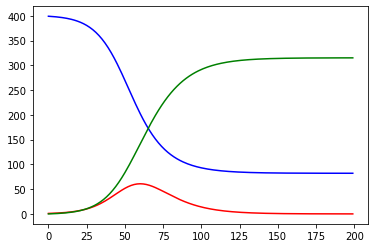

In [34]:
import math
import numpy as np
import matplotlib.pyplot as plt

def BasicSIR(S, I, R, alpha, beta):
    """Returns Number of Susceptible, Infected and Recovered in a Population N
        Parameters
        ----------
        S : int
            Number of Susceptible Individuals
        I : int 
            Number of Infected Individuals
        R : int
            Number of Recovered Individuals
        alpha : float
            Rate of Infection 
        beta : float
            Percentage of recovered individuals in the population
        Returns
        -------
        S_1: int
            Number of Susceptible Individuals at time t+1
        I_1: int 
            Number of Infected Individuals at time t+1
        R_1 : int
            Number of Recovered Individuals at time t+1
    """
    def _calc_S_1(S, I, R, alpha):
        #math ceil is used, because you cannot have a fractionally sick person (thus round up should be invoked)
        return (-alpha * S * I)/(S+I+R)
    def _calc_I_1(S, I, R, alpha, beta):
        #math ceil is used, because you cannot have a fractionally sick person (thus round up should be invoked)
        return ((alpha*S*I)/(S+I+R)) - (beta*I)
    def _calc_R_1(I, beta):
        #Given Recovery is a function of the percent of infected, people must wait the full cycle to recover (round down)  
        return (beta*I)
    S_1 = S+ _calc_S_1(S, I, R,  alpha)
    I_1 = I+ _calc_I_1(S_1, I, R, alpha,beta)
    R_1 = R+ _calc_R_1(I_1, beta)
    return S_1, I_1, R_1

S = 399
#Must be initialized to at least 1 (if 0 nobody would be infected)
I = 1
R = 0
alpha = 0.2
beta = 0.1

DayTrack = np.zeros((3,200))

for t in range(200):
    DayTrack[0][t] = S
    DayTrack[1][t] = I
    DayTrack[2][t] = R
    S, I, R = BasicSIR(S, I, R, alpha, beta)

time = [x for x in range(200)]
plt.plot(time, DayTrack[0], 'b')
plt.plot(time, DayTrack[1], 'r')
plt.plot(time, DayTrack[2], 'g')

In [ ]:
.2 * 400

In [ ]:
from dataclasses import dataclass
import numpy as np
import pandas as pd
import math

@dataclass
class BasicSIR:
    """Parent class for Susceptible, Infected and Recovered Individuals"""
    alpha: float
    beta: float
    S: int
    I: int = 0
    R: int = 0
    
    def S_1(self) -> int:
        return math.ceil(-self.alpha * self.S *self.I)
    def I_1(self) -> int:
        return math.ceil((self.alpha*self.S*self.I) - (self.beta*self.I))
    def R_1(self) -> int:
        return math.floor(self.beta * self.I)
